# CUSTOMER CHURN ANALYSIS

## Content

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

I have to examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

# Importing Data

In [177]:
import pandas as pd
telco_churn=pd.read_csv('telecom_customer_churn.csv')

# Putting the Data in Data Frame

In [178]:
tc=pd.DataFrame(data=telco_churn)
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [179]:
tc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# About the Columns

1. CustomerID :

Customer ID

2. Gender :

Whether the customer is a male or a female

3. SeniorCitizen :

Whether the customer is a senior citizen or not (1, 0)

4. Partner :

Whether the customer has a partner or not (Yes, No)

5. Dependents :

Whether the customer has dependents or not (Yes, No)

6. Tenure :

Number of months the customer has stayed with the company

7. PhoneService :

Whether the customer has a phone service or not (Yes, No)

8. MultipleLines :

Whether the customer has multiple lines or not (Yes, No, No phone service)

9. InternetService :

Customer’s internet service provider (DSL, Fiber optic, No)

10. OnlineSecurity :

Whether the customer has online security or not (Yes, No, No internet service)

11. OnlineBackup :

Whether the customer has online backup or not (Yes, No, No internet service)

12. DeviceProtection :

Whether the customer has device protection or not (Yes, No, No internet service)

13. TechSupport :

Whether the customer has tech support or not (Yes, No, No internet service)

14. StreamingTV :

Whether the customer has streaming TV or not (Yes, No, No internet service)

15. StreamingMovies :

Whether the customer has streaming movies or not (Yes, No, No internet service)

16. Contract :

The contract term of the customer (Month-to-month, One year, Two year)

17. PaperlessBilling :

Whether the customer has paperless billing or not (Yes, No)

18. PaymentMethod :

The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

19. MonthlyCharges :

The amount charged to the customer monthly

20. TotalCharges :

The total amount charged to the customer

21. Churn :

Whether the customer churned or not (Yes or No)

In [180]:
# Checking information of variables
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**No column is containing null values**

In [181]:
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [182]:
# Dropping column customerID
tc.drop(['customerID'],axis=1,inplace=True)
tc.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


## Exploratory Data Analysis

In [183]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [184]:
# Checking Rows and columns
tc.shape

(7043, 20)

<AxesSubplot:xlabel='Churn', ylabel='count'>

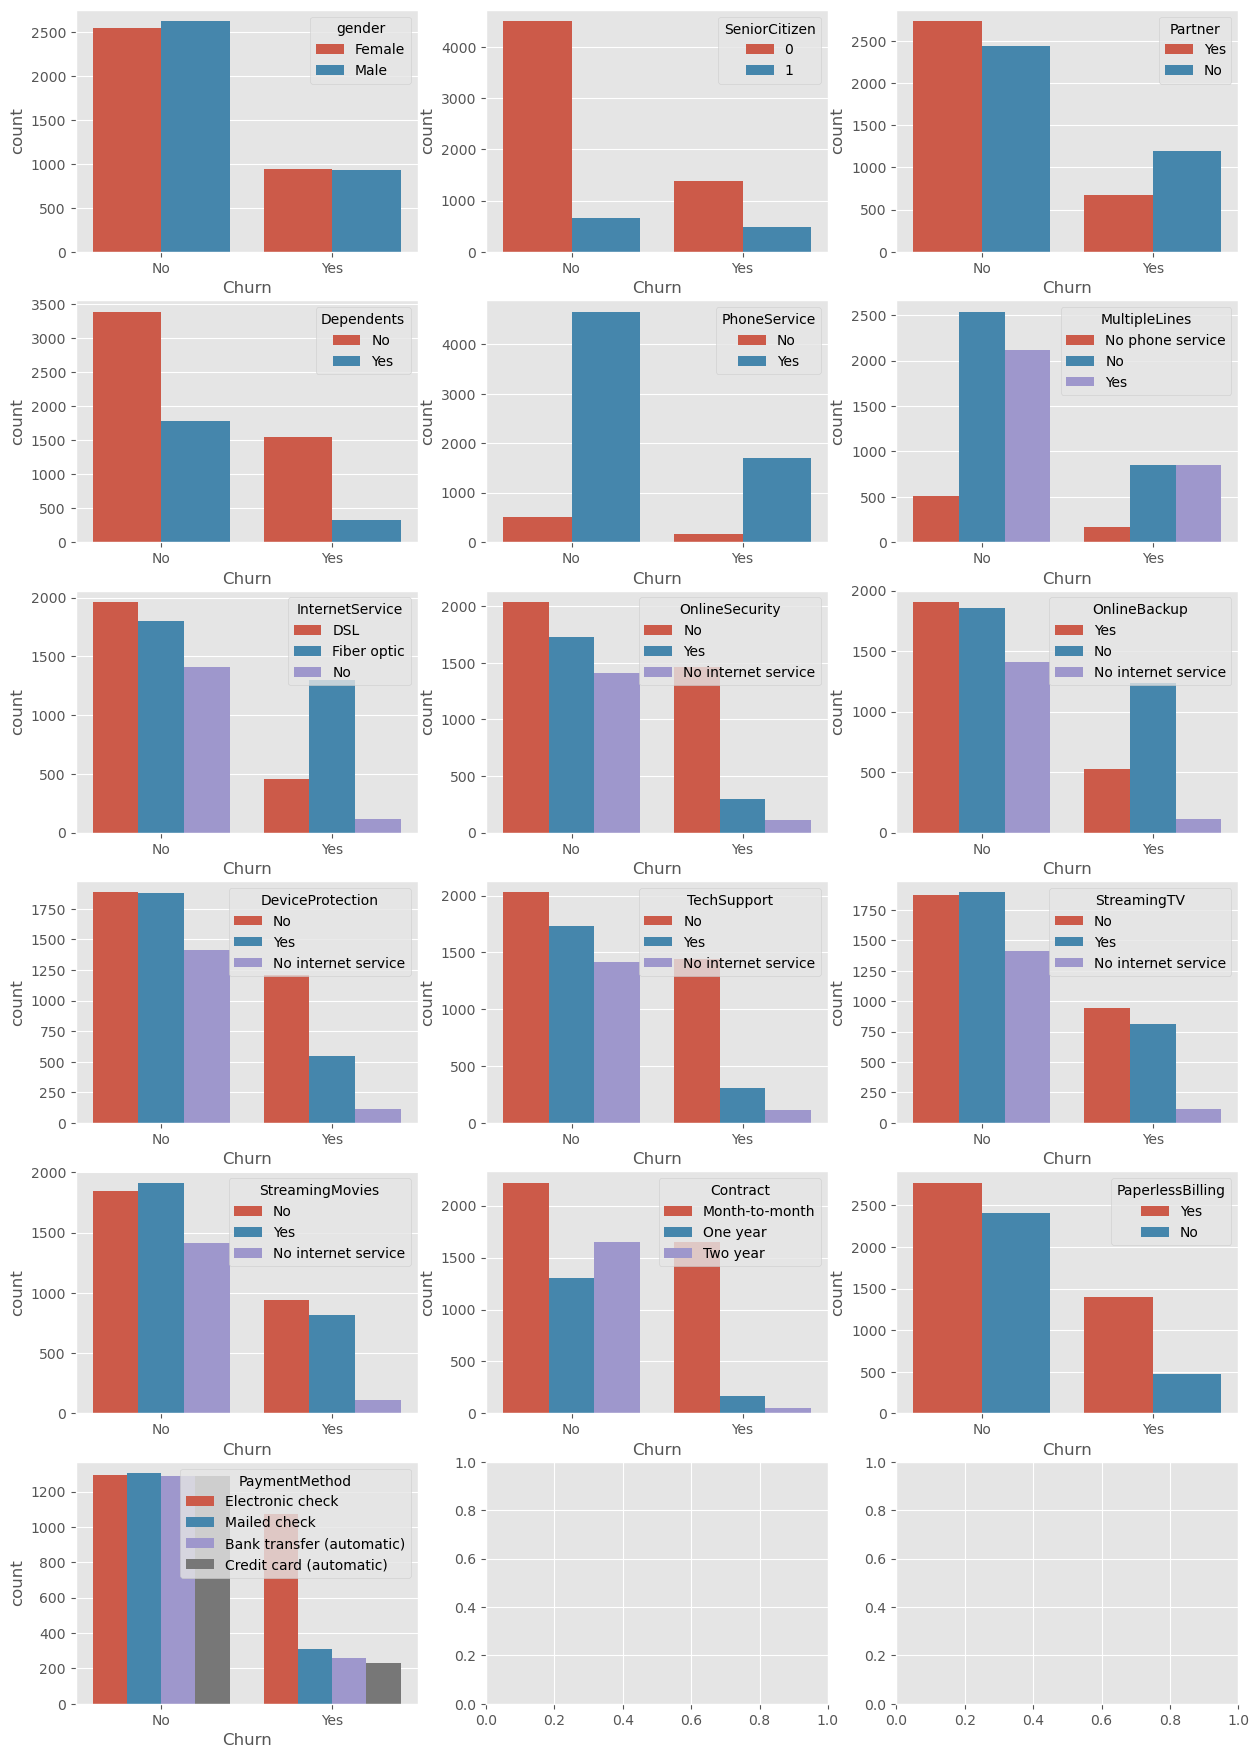

In [185]:
fig,ax=plt.subplots(6,3,figsize=(15,22))
sns.countplot(x='Churn',hue='gender',data=tc, ax=ax[0][0])
sns.countplot(x='Churn',hue='SeniorCitizen',data=tc, ax=ax[0][1])
sns.countplot(x='Churn',hue='Partner',data=tc, ax=ax[0][2])
sns.countplot(x='Churn',hue='Dependents',data=tc, ax=ax[1][0])
sns.countplot(x='Churn',hue='PhoneService',data=tc, ax=ax[1][1])
sns.countplot(x='Churn',hue='MultipleLines',data=tc, ax=ax[1][2])
sns.countplot(x='Churn',hue='InternetService',data=tc, ax=ax[2][0])
sns.countplot(x='Churn',hue='OnlineSecurity',data=tc, ax=ax[2][1])
sns.countplot(x='Churn',hue='OnlineBackup',data=tc, ax=ax[2][2])
sns.countplot(x='Churn',hue='DeviceProtection',data=tc, ax=ax[3][0])
sns.countplot(x='Churn',hue='TechSupport',data=tc, ax=ax[3][1])
sns.countplot(x='Churn',hue='StreamingTV',data=tc, ax=ax[3][2])
sns.countplot(x='Churn',hue='StreamingMovies',data=tc, ax=ax[4][0])
sns.countplot(x='Churn',hue='Contract',data=tc, ax=ax[4][1])
sns.countplot(x='Churn',hue='PaperlessBilling',data=tc, ax=ax[4][2])
sns.countplot(x='Churn',hue='PaymentMethod',data=tc, ax=ax[5][0])

**We can see if the Churn is present or not with the different columns**

**Key Observations**

1. Mostly no churn is present if the customer is not a senior citizen

2. Mostly no chgurn is present if the customer has no dependents

3. Customer who have phone service has mostly no churn

4. Most people with internet service of DSL has no churn

5. Peole who pay their bill with Electronic check has most churn as compared to the other methods

In [186]:
tc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [187]:
tc[tc['tenure'] ==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


**In the above table tenure is 0 and there is no total charges so we'll drop these rows**

In [188]:
tc.drop(labels=tc[tc['tenure'] ==0].index, axis=0, inplace=True)

In [189]:
# Again checking if tenure is 0
tc[tc['tenure'] ==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


**Successfully dropped the data**

<AxesSubplot:xlabel='tenure', ylabel='count'>

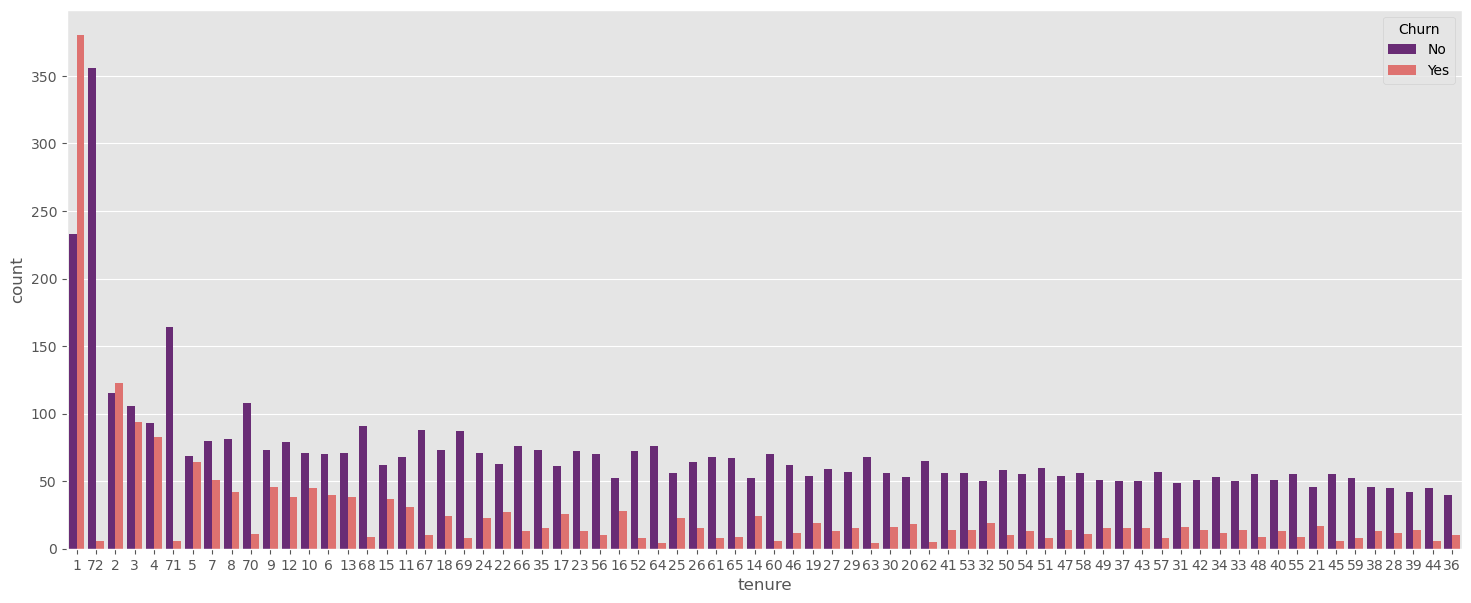

In [190]:
plt.figure(figsize=(18,7),dpi=100)
sns.countplot(data=tc,x='tenure',hue='Churn',order=tc['tenure'].value_counts().index,palette='magma')

**Most People with tenure of 1 month has the churn, while most people with tenure of 72 months are very loyal to the company and has no churn**

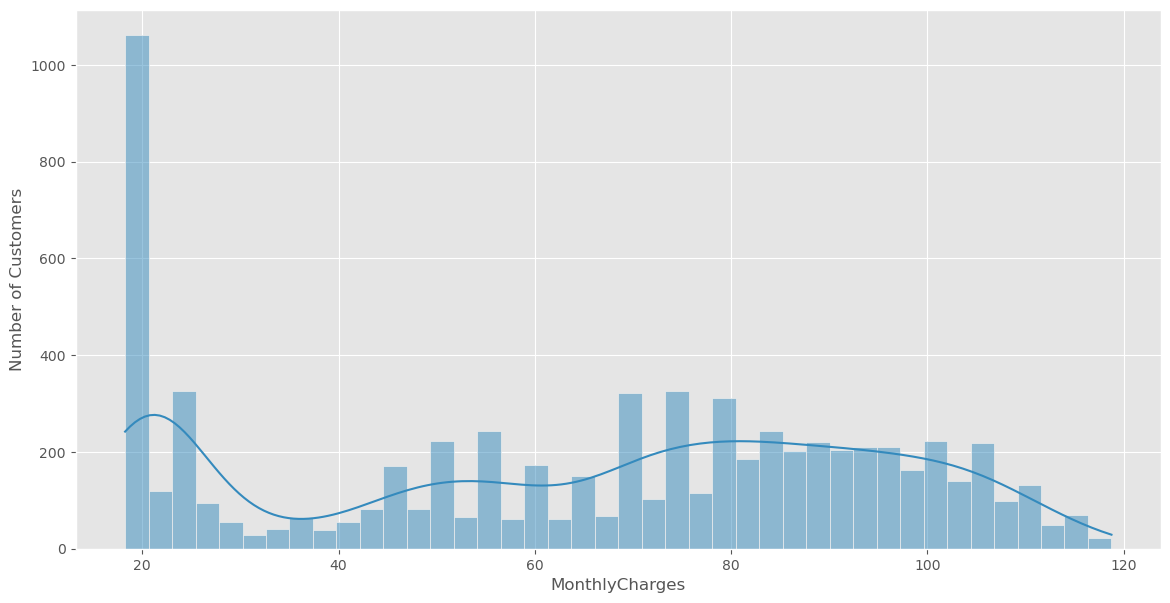

In [191]:
plt.figure(figsize=(14,7),dpi=100)
sns.histplot(data=tc,x='MonthlyCharges',kde=True,bins=42)
plt.ylabel('Number of Customers')
plt.show()

**More than 1000 customers pay the monthly bill of less than 21 and very few pay the bill of 40 and above 110**

In [192]:
# Converting TotalCharges into float from object
tc['TotalCharges']=tc['TotalCharges'].astype(float)

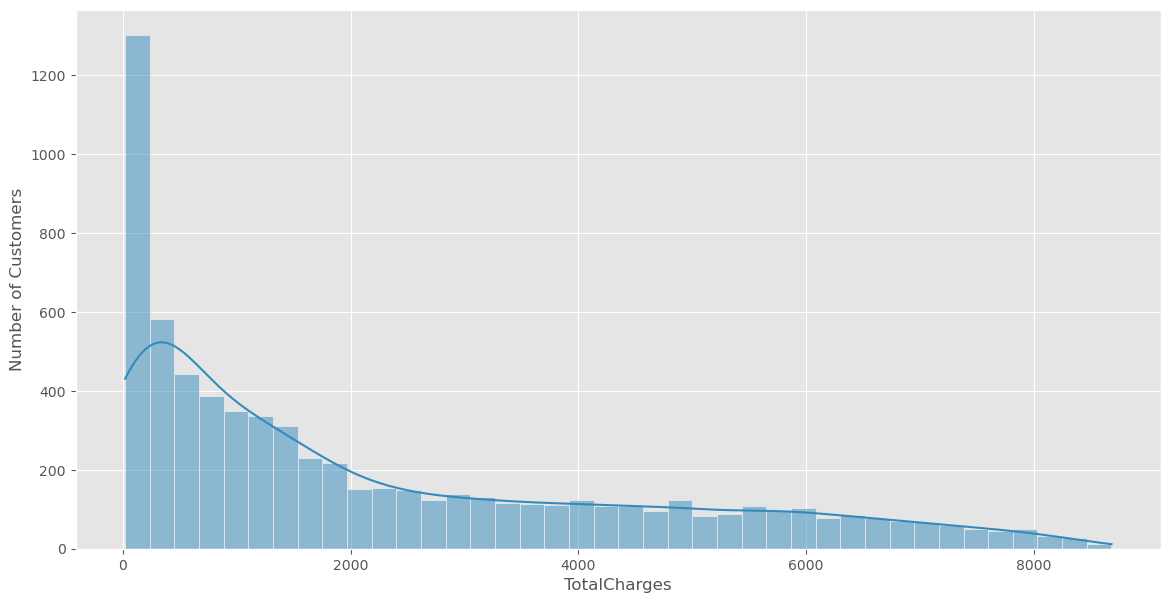

In [193]:
plt.style.use('ggplot')
plt.figure(figsize=(14,7),dpi=100)
sns.histplot(data=tc,x='TotalCharges',kde=True,bins=40)
plt.ylabel('Number of Customers')
plt.show()

**Most customers pay total bill of less than 2000 and very few pay of more than 8000**

Unique Values : [0 1]
Frequency Values : [5890, 1142]


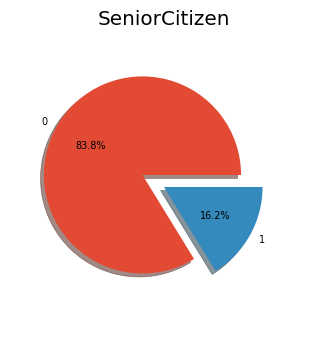

In [194]:
# Counting the frequency of unique elements
list_=tc['SeniorCitizen']

unique,frequency=np.unique(list_,return_counts=True)
frequency=list(frequency)

print('Unique Values :',unique)
print('Frequency Values :',frequency)

# Creating pie plot for Senior Citizen

max_val=max(frequency)
max_index=frequency.index(max_val)
myexplode=tuple([0 if i!=max_index else 0.2 for i in range(len(frequency))])

labels=unique
sizes=frequency
plt.figure(figsize=(4,4),dpi=100)
plt.pie(sizes,labels=labels, explode=myexplode , shadow=True, autopct='%1.1f%%', radius=0.8, textprops={'fontsize':7})
plt.title('SeniorCitizen')
plt.show()

**More than 80% of people are not senior citizen**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

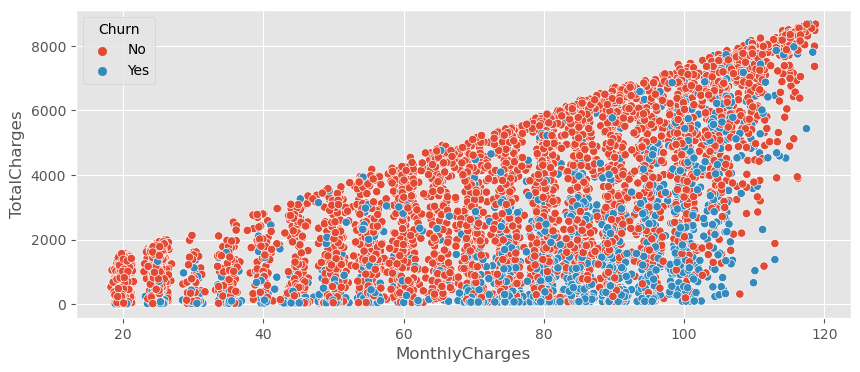

In [195]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=tc)

**There is a positive relation between Monthly and Total Charges**

**Churn rate is also increasing with increase in Monthly Charges**

In [196]:
tc.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


### Converting Categorical data of "tc" into integer

**Now we will convert the categorical variable *("gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod" and "Churn")* into numeric.**

**We will apply Label Encoding to above variables. It will convert the categorical data into numeric.**

In [197]:
# Converting elements of variables into numeric
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

a=["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
   "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod","Churn"]
for i in a:
    tc[i]=l.fit_transform(tc[i].astype(str))

In [198]:
tc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**All the categorical data is converted into numerical**

In [199]:
tc.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


<AxesSubplot:>

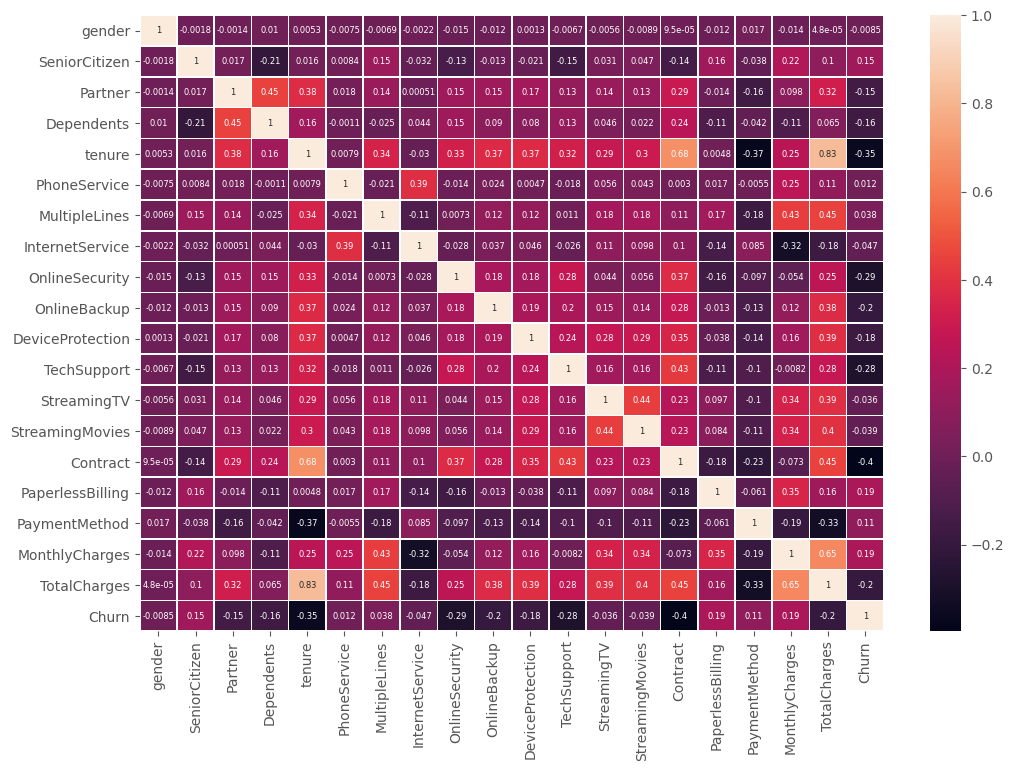

In [201]:
# plotting heatmap to see the correlation
plt.figure(figsize=(12,8),dpi=100)
sns.heatmap(tc.corr(),annot=True,linewidth=0.5,linecolor='White',annot_kws={'fontsize':6})

**Most variables are correlated with each other but not with Churn**

**tenure is highly correlated with contract and Total Charges**

In [202]:
# Creating Variance Inflation Factor function

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

tcc_=add_constant(tc)
def tcc_vif():
    vif=pd.DataFrame()
    vif['Variables']=tcc_.columns
    vif['VIF Factor']=[variance_inflation_factor(tcc_.values,i)
                       for i in range(tcc_.shape[1])]
    return (vif)

In [203]:
tcc_vif()

,Variables,VIF Factor
0,const,35.129449
1,gender,1.001903
2,SeniorCitizen,1.152057
3,Partner,1.461176
4,Dependents,1.380561
5,tenure,7.505702
6,PhoneService,1.634125
7,MultipleLines,1.397391
8,InternetService,1.834546
9,OnlineSecurity,1.277858


**Tenure and Total Charges have highest variance inflation factor, we'll drop Total charges as it has the highest inflation factor**

In [204]:
tc.drop(['TotalCharges'],axis=1, inplace=True)
tc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [205]:
tc.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


## Outliers

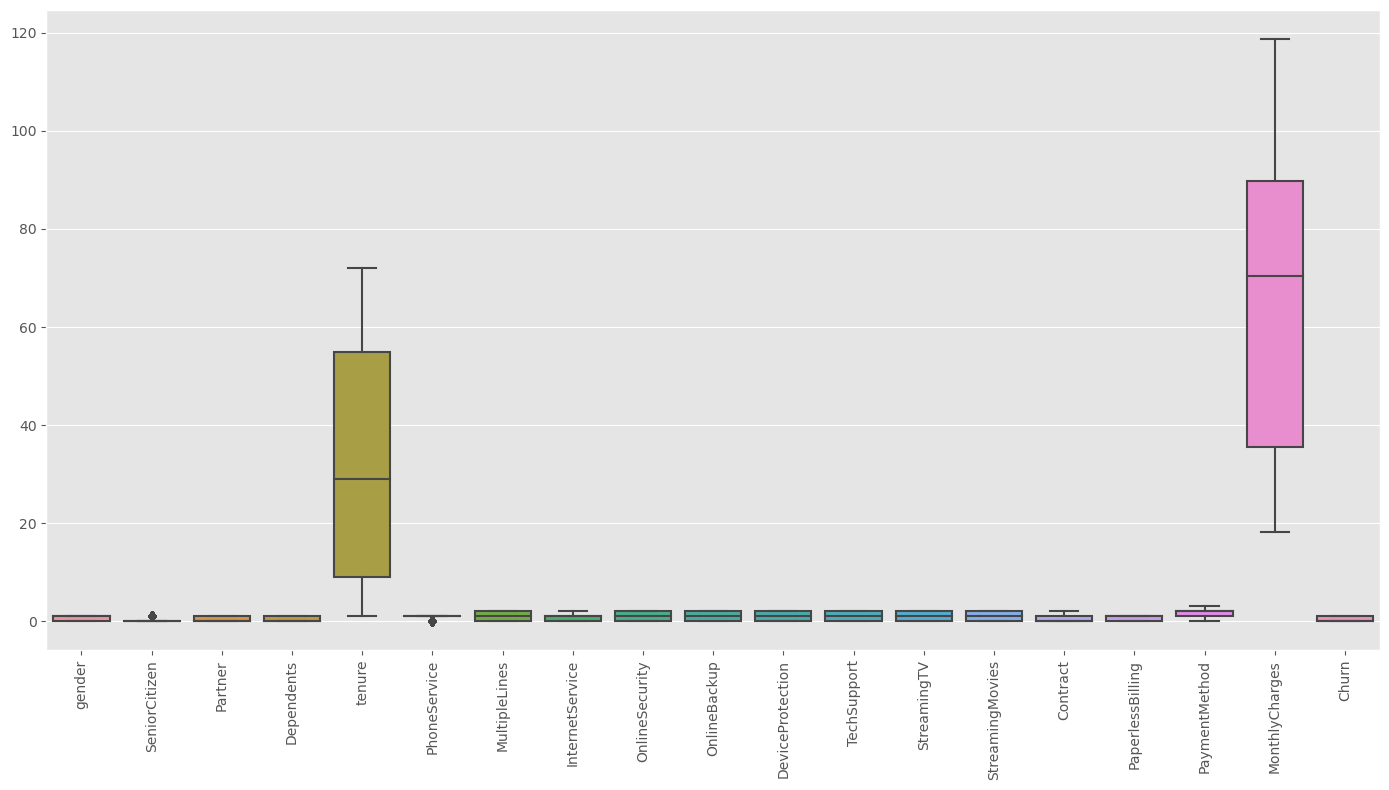

In [208]:
# Checking outliers by plotting dataset into boxplot
plt.figure(figsize=(14,8),dpi=100)
sns.boxplot(data=tc)
plt.xticks(rotation=90)
plt.tight_layout()

**Phone service and senior citizen has some outliers so we will drop these two columns**

In [209]:
tc.drop(['SeniorCitizen', 'PhoneService'], axis=1, inplace=True)
tc.head()

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,34,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,2,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,45,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,70.70,1


## Again checking the Outliers

<AxesSubplot:>

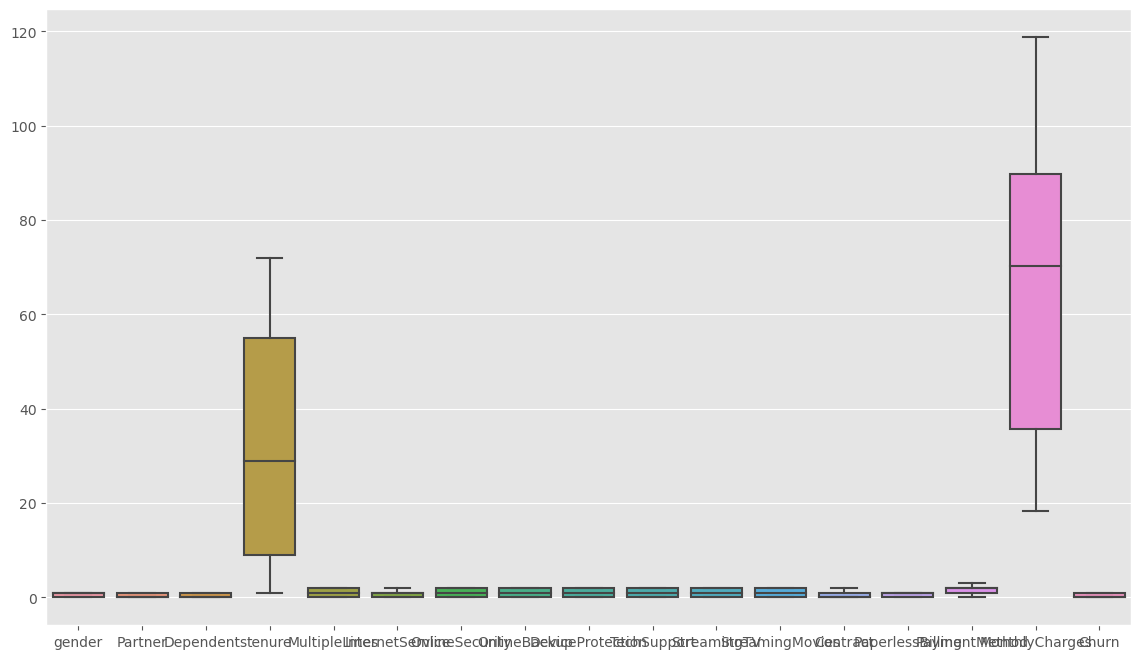

In [210]:
plt.figure(figsize=(14,8),dpi=100)
sns.boxplot(data=tc)

**No outliers are present now**

## Model Creation for Churn

In [211]:
tc.head()

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,34,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,2,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,45,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [212]:
x=tc.drop(columns=['Churn'])
y=tc[['Churn']]

print(x.shape)
print(y.shape)

(7032, 16)
(7032, 1)


**We have created two variables containing Input data (x) and Output data (y).**

In [213]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=50)

**We've splitted our dataset into training and testing, where we have used our 80% of data for training and 20% of data for testing**

### Scaling x_train and x_test using Standard Scaler

In [214]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Making a function to calculate and print following features for the model : Accuracy Score, Confusion Matrix, Classification Report.**

In [216]:
# Creating function for checking accuracy score, confusion matrix and classification report of prediction models
def classifier_func(y_test,pred):
    ac=accuracy_score(y_test,pred)
    cm=confusion_matrix(y_test,pred)
    cr=classification_report(y_test,pred)
    
    print('Accuracy Score :',ac,'\n')
    print('Confusion Matrix :',cm,'\n')
    print('Classification Report :',cm,'\n')

**Making a Cross Validation function**

In [217]:
from sklearn.model_selection import cross_val_score
def cross_val_accuracy(model,x_train=x_train,y_train=y_train):
    accuracies=cross_val_score(estimator=model,X = x_train, y = y_train ,cv=10)
    print('Cross_val_Accuracy: {:.2f} %'.format(accuracies.mean()*100),'\n')
    print('Cross_val_Standard Deviation: {:.2f} %'.format(accuracies.std()*100),'\n')

### Logistic Regression

**Creating Logistic Regression Model, it'll fit the Logistic Regression model on x_train and y_train and predict the x_test and store it in pred. We will print predicted Churn and actual Churn and outputs of the above functions**

In [218]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print('\033[1m' + 'LOGISTIC REGRESSION MODEL SUMMERY\n' + '\033[0m')
classifier_func(y_test,pred)
cross_val_accuracy(lr)

print('Predicted Churn',pred)
print('\nActual Churn\n',y_test)

LOGISTIC REGRESSION MODEL SUMMERY

Accuracy Score : 0.8130774697938877 

Confusion Matrix : [[944 115]
 [148 200]] 

Classification Report : [[944 115]
 [148 200]] 

Cross_val_Accuracy: 79.38 % 

Cross_val_Standard Deviation: 1.50 % 

Predicted Churn [0 0 0 ... 0 0 0]

Actual Churn
       Churn
4460      0
733       0
5514      0
5864      0
916       0
...     ...
5025      0
5171      0
6540      0
3130      0
5511      0

[1407 rows x 1 columns]


### Decision Tree Classifier

**Creating Decision Tree Classifier Model, it'll fit the Decision Tree Classifier model on x_train and y_train and predict the x_test and store it in pred_dtc. We will print predicted Churn and actual Churn and outputs of the above functions**

In [219]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print('\033[1m' + 'DECISION TREE CLASSIFIER MODEL SUMMERY\n' + '\033[0m')
classifier_func(y_test,pred_dtc)
cross_val_accuracy(dtc)

print('Predicted Churn',pred_dtc)
print('\nActual Churn\n',y_test)

DECISION TREE CLASSIFIER MODEL SUMMERY

Accuracy Score : 0.7114427860696517 

Confusion Matrix : [[832 227]
 [179 169]] 

Classification Report : [[832 227]
 [179 169]] 

Cross_val_Accuracy: 72.85 % 

Cross_val_Standard Deviation: 2.18 % 

Predicted Churn [0 0 1 ... 0 0 0]

Actual Churn
       Churn
4460      0
733       0
5514      0
5864      0
916       0
...     ...
5025      0
5171      0
6540      0
3130      0
5511      0

[1407 rows x 1 columns]


### KNeighbors Classifier

**Creating KNeighbors Classifier Model, it'll fit the KNeighbors Classifier model on x_train and y_train and predict the x_test and store it in pred_knc. We will print predicted Churn and actual Churn and outputs of the above functions**

In [220]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)

print('\033[1m' + 'KNEIGHBORS CLASSIFIER MODEL SUMMERY\n' + '\033[0m')
classifier_func(y_test,pred_knc)
cross_val_accuracy(knc)

print('Predicted Churn',pred_knc)
print('\nActual Churn\n',y_test)

KNEIGHBORS CLASSIFIER MODEL SUMMERY

Accuracy Score : 0.7633262260127932 

Confusion Matrix : [[903 156]
 [177 171]] 

Classification Report : [[903 156]
 [177 171]] 

Cross_val_Accuracy: 75.43 % 

Cross_val_Standard Deviation: 1.66 % 

Predicted Churn [1 0 0 ... 0 0 0]

Actual Churn
       Churn
4460      0
733       0
5514      0
5864      0
916       0
...     ...
5025      0
5171      0
6540      0
3130      0
5511      0

[1407 rows x 1 columns]


### Gradient Boosting Classifier

**Creating Gradient Boosting Classifier Model, it'll fit the Gradient Boosting Classifier model on x_train and y_train and predict the x_test and store it in pred_gc. We will print predicted Churn and actual Churn and outputs of the above functions**

In [221]:
gc=GradientBoostingClassifier()
gc.fit(x_train,y_train)
pred_gc=gc.predict(x_test)

print('\033[1m' + 'GRADIENT BOOSTING CLASSIFIER MODEL SUMMERY\n' + '\033[0m')
classifier_func(y_test,pred_gc)
cross_val_accuracy(gc)

print('Predicted Churn',pred_gc)
print('\nActual Churn\n',y_test)

GRADIENT BOOSTING CLASSIFIER MODEL SUMMERY

Accuracy Score : 0.8159203980099502 

Confusion Matrix : [[952 107]
 [152 196]] 

Classification Report : [[952 107]
 [152 196]] 

Cross_val_Accuracy: 79.47 % 

Cross_val_Standard Deviation: 1.44 % 

Predicted Churn [0 0 1 ... 0 0 0]

Actual Churn
       Churn
4460      0
733       0
5514      0
5864      0
916       0
...     ...
5025      0
5171      0
6540      0
3130      0
5511      0

[1407 rows x 1 columns]


### The best performing model for "Churn" is Gradient Boosting Classifier

### Model Saving

In [222]:
import pickle
filename='customer_churn_model.pkl'
pickle.dump(gc,open(filename,'wb'))

**Gradient Boosting Classifier is saved with the name "customer_churn_model"**

## Conclusion

In [223]:
# printing the predicted result and the actual result
print('Predicted Result','\n', pred_gc)
print('Actual Result','\n', y_test)

Predicted Result 
 [0 0 1 ... 0 0 0]
Actual Result 
       Churn
4460      0
733       0
5514      0
5864      0
916       0
...     ...
5025      0
5171      0
6540      0
3130      0
5511      0

[1407 rows x 1 columns]


**As we can see above the model is predicted quite well**

# THE END